### Differential Equation

$\frac{\mathrm{d}\Psi_1}{\mathrm{d}x} = 4x,$

$\frac{\mathrm{d}\Psi_2}{\mathrm{d}x} = 2x,$

$\Psi_1(0) = 0, \Psi_2(0) = 0, x \in [0, 5]$

In [1]:
from typing import List
import autograd.numpy as np

from neural_network import MLPNeuralNetwork
from optimizers import gradient_descent, adam
from activation_functions import elu, sigmoid, tanh, arctan
from plotting_tools import plot_ode, plot_system_ode, print_error

In [2]:
PSI_0 = np.array([0, 0])


def derivative(x, psi) -> np.ndarray:
    """Example #4 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_1_dot = 4 * x
    psi_2_dot = 2 * x
    return np.array([psi_1_dot, psi_2_dot])


def analytical_solution(x):
    """Analytical solution to example #4.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    psi_1 = 2 * x**2
    psi_2 = x**2

    return np.array([psi_1, psi_2])


def trial_solution(
    t: np.array, nn: MLPNeuralNetwork, weights: List[np.array], k=0
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights: The weights and biases of the neural network

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(t),)
    """
    fp = nn.forward(t, weights).reshape(t.size)
    return PSI_0[k] + t * fp

### Training

Iteration:  0
 8.43880264671956
Iteration:  1
 8.32581269624448
Iteration:  2
 8.213556743145016
Iteration:  3
 8.10209743980728
Iteration:  4
 7.991495254757977
Iteration:  5
 7.881805630857858
Iteration:  6
 7.773079533537905
Iteration:  7
 7.665366381051605
Iteration:  8
 7.558716101579534
Iteration:  9
 7.453178961435786
Iteration:  10
 7.34880464194117
Iteration:  11
 7.245641490044897
Iteration:  12
 7.143736140274323
Iteration:  13
 7.043133431570427
Iteration:  14
 6.943876550182692
Iteration:  15
 6.846007418445654
Iteration:  16
 6.749567162697924
Iteration:  17
 6.654596327793985
Iteration:  18
 6.561134775053035
Iteration:  19
 6.469221378270835
Iteration:  20
 6.378893579819534
Iteration:  21
 6.290186867285243
Iteration:  22
 6.203134333214021
Iteration:  23
 6.117766448543972
Iteration:  24
 6.03411083417958
Iteration:  25
 5.952191762091175
Iteration:  26
 5.872029522296167
Iteration:  27
 5.793640003789881
Iteration:  28
 5.717034669879426
Iteration:  29
 5.64222065083

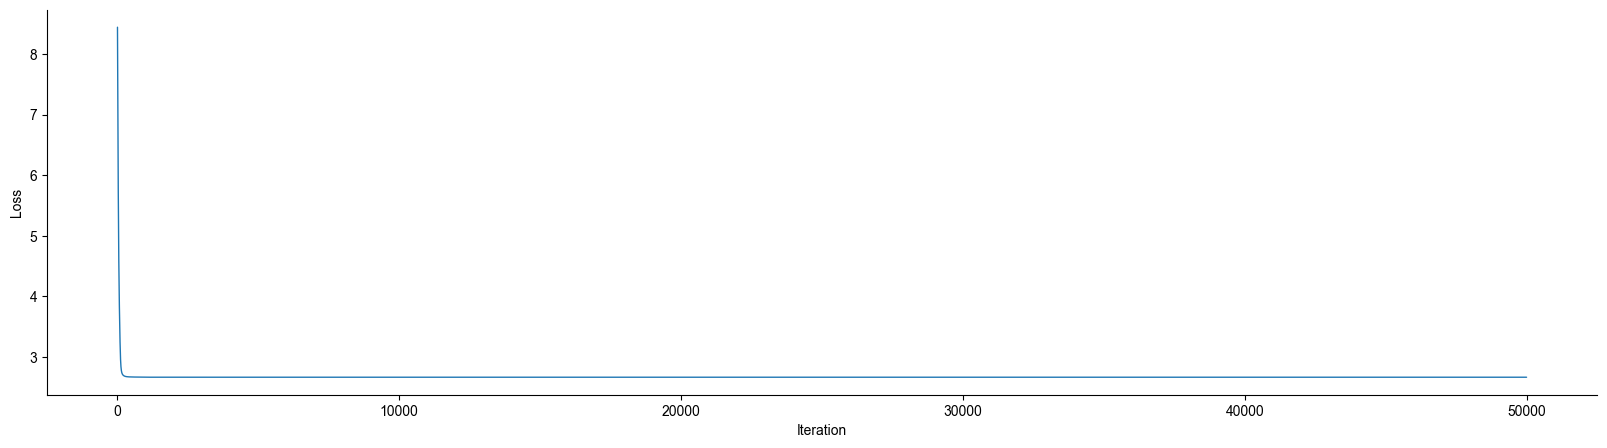

In [3]:
def train():
    t = np.arange(0, 5, 0.5)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn1 = MLPNeuralNetwork(1, hidden_sizes, 1, activation_fns)
    nn2 = MLPNeuralNetwork(1, hidden_sizes, 1, activation_fns)
    adam(
        t,
        [nn1, nn2],
        trial_solution,
        derivative,
        num_iters=50000,
        step_size=0.01,
        threshold=0.01,
        log=True,
    )

    return [nn1, nn2]


nns = train()

### Evaluating Results

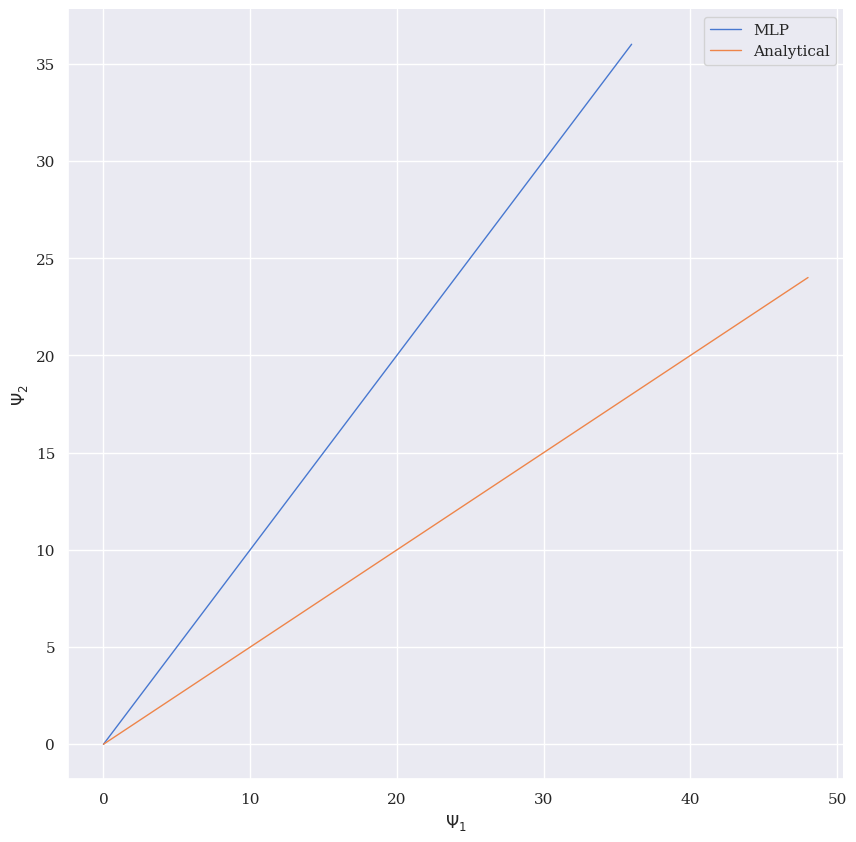

In [4]:
plot_system_ode(nns, trial_solution, analytical_solution, t=np.arange(0, 5, 0.1))

In [5]:
t = np.arange(0, 5, 0.1)
res = np.array([trial_solution(t, nns[i], nns[i].weights, i) for i in range(len(nns))])

an_sol = analytical_solution(t)

print_error(res, an_sol)

[[ 0.00000000e+00 -5.13330371e-03 -2.02901810e-02 -4.54569951e-02
  -8.06274981e-02 -1.25799613e-01 -1.80973303e-01 -2.46149281e-01
  -3.21328317e-01 -4.06510959e-01 -5.01697511e-01 -6.06888128e-01
  -7.22082972e-01 -8.47282337e-01 -9.82486734e-01 -1.12769690e+00
  -1.28291374e+00 -1.44813821e+00 -1.62337116e+00 -1.80861313e+00
  -2.00386420e+00 -2.20912385e+00 -2.42439093e+00 -2.64966368e+00
  -2.88493992e+00 -3.13021735e+00 -3.38549395e+00 -3.65076844e+00
  -3.92604075e+00 -4.21131237e+00 -4.50658649e+00 -4.81186781e+00
  -5.12716201e+00 -5.45247469e+00 -5.78781000e+00 -6.13316903e+00
  -6.48854826e+00 -6.85393835e+00 -7.22932402e+00 -7.61468517e+00
  -8.01000021e+00 -8.41525168e+00 -8.83043490e+00 -9.25556951e+00
  -9.69071417e+00 -1.01359839e+01 -1.05915698e+01 -1.10577603e+01
  -1.15349624e+01 -1.20237238e+01]
 [ 0.00000000e+00  4.92322722e-03  1.97562633e-02  4.45816660e-02
   7.94476819e-02  1.24376081e-01  1.79369382e-01  2.44417281e-01
   3.19502167e-01  4.04603638e-01  4.9970